In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from neurodsp.spectral import compute_spectrum_welch
from neurodsp.plts import plot_time_series, plot_power_spectra
from fooof.plts.spectra import plot_spectrum, plot_spectra
from fooof.plts.fm import plot_fm
from glob import glob
from scipy import signal
from utils import *
from fooof import FOOOF
from fooof.core.funcs import gaussian_function
from fooof.sim import gen_freqs
from fooof.analysis import get_band_peak_fm
from fooof.plts.periodic import plot_peak_fits

In [2]:
# read the data
data = sorted(glob('data/w12_18_spont/lfp*.ibw'))
# get 1st probe data
files_1st_probe = [d for d in data if int(d.split('/')[-1].split('.')[0].split('p')[-1]) >= 65 and int(d.split('/')[-1].split('.')[0].split('p')[-1]) <= 80]
# get 2nd probe data
files_2nd_probe = [d for d in data if int(d.split('/')[-1].split('.')[0].split('p')[-1]) >= 97 and int(d.split('/')[-1].split('.')[0].split('p')[-1]) <= 112]

# load the data 
data_1st_probe = [load_data(f) for f in files_1st_probe]
data_2nd_probe = [load_data(f) for f in files_2nd_probe]

# get the sampling rate
fs = data_1st_probe[0].sampling_rate

# get the time series
ts_1st_probe = [np.squeeze(d.magnitude) for d in data_1st_probe]
ts_2nd_probe = [np.squeeze(d.magnitude) for d in data_2nd_probe]

# get times
times_1st_probe = [np.squeeze(d.times) for d in data_1st_probe]
times_2nd_probe = [np.squeeze(d.times) for d in data_2nd_probe]

In [3]:
# filter the data
ts_1st_probe_filtered = [filter_line_noise(ts, fs, 550) for ts in ts_1st_probe]
ts_2nd_probe_filtered = [filter_line_noise(ts, fs, 550) for ts in ts_2nd_probe]

In [39]:
center_freqs_1st_probe = []
# go through each electrode 
for i in range(len(ts_1st_probe_filtered)):
    ts = ts_1st_probe_filtered[i]
    times = times_1st_probe[i]
    # for each data file, go through the following steps
    # 1. create time intervals
    intervals = np.arange(0, int(np.max(times)), 150)
    # 2. then for each time interval
    center_freqs = []
    for j in range(len(intervals)-1):
        idx = np.where((times >= intervals[j]) & (times < intervals[j+1]))[0]
        # print('for interval from', intervals[j], 'to', intervals[j+1], 'seconds')
        freqs, powers = compute_spectrum_welch(ts[idx], fs=1000)

        fm = FOOOF(verbose=False)
        fm.fit(freqs, powers, freq_range=[1, 100])
        cf = get_band_peak_fm(fm, [1, 100]) # SHOULD I GET THE PEAKS FOR ALL BANDS?
        center_freqs.extend(cf)
    
    
    idx = np.where((times >= intervals[j+1]))[0]
    freqs, powers = compute_spectrum_welch(ts[idx], fs=1000)
    fm = FOOOF(verbose=False)
    fm.fit(freqs, powers, freq_range=[1, 35])

    cf = get_band_peak_fm(fm, [1, 35]) # SHOULD I GET THE PEAKS FOR ALL BANDS?
    center_freqs.extend(cf)
    
    center_freqs = np.array(center_freqs)    
    center_freqs_1st_probe.append(center_freqs)

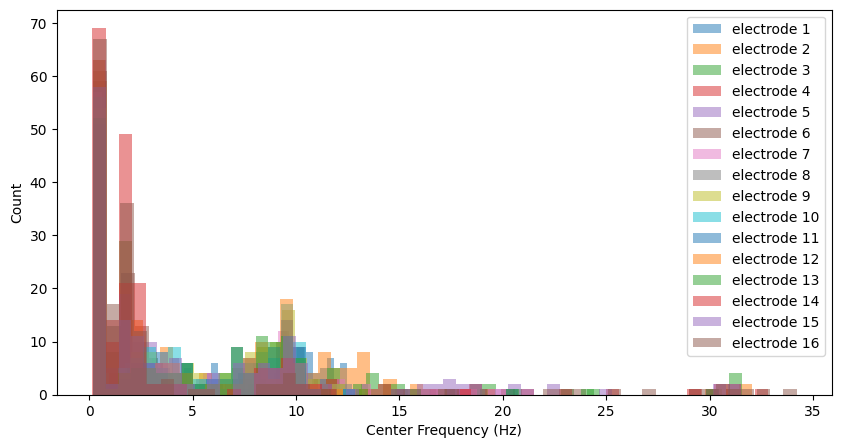

In [7]:
# plot histograms of center frequencies
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for i in range(len(center_freqs_1st_probe)):
    ax.hist(center_freqs_1st_probe[i], bins=50, alpha=0.5, label='electrode {}'.format(i+1))
ax.set_xlabel('Center Frequency (Hz)')
ax.set_ylabel('Count')
ax.legend()
plt.show()

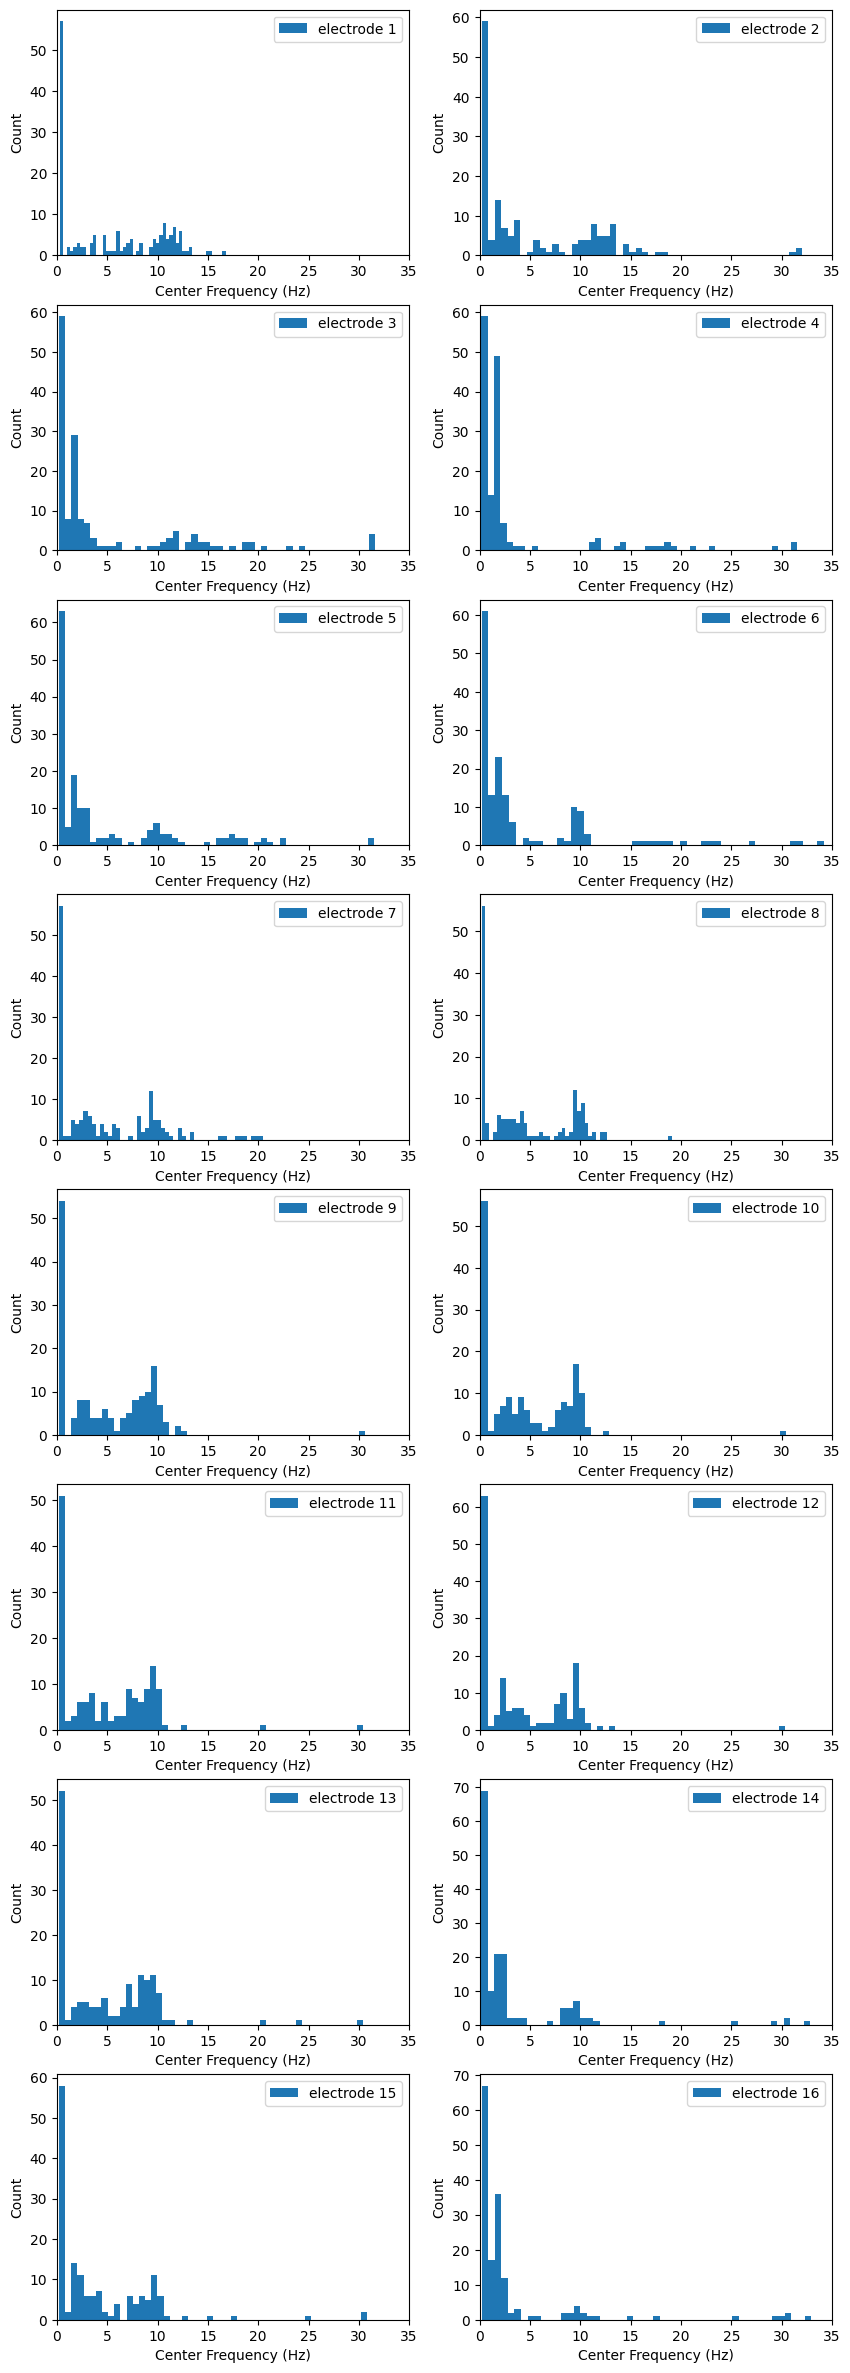

In [8]:
# plot histograms of center frequencies
fig, ax = plt.subplots(8, 2, figsize=(10, 30))
axes = ax.flatten()
for i, ax in zip(range(len(center_freqs_1st_probe)), axes):
    ax.hist(center_freqs_1st_probe[i], bins=50, label='electrode {}'.format(i+1))
    ax.set_xlabel('Center Frequency (Hz)')
    ax.set_ylabel('Count')
    ax.set_xlim([0, 35])
    ax.legend()
plt.show()

In [9]:
center_freqs_2nd_probe = []
# go through each electrode 
for i in range(len(ts_2nd_probe_filtered)):
    ts = ts_2nd_probe_filtered[i]
    times = times_2nd_probe[i]
    # for each data file, go through the following steps
    # 1. create time intervals
    intervals = np.arange(0, int(np.max(times)), 30)
    # 2. then for each time interval
    center_freqs = []
    for j in range(len(intervals)-1):
        idx = np.where((times >= intervals[j]) & (times < intervals[j+1]))[0]
        # print('for interval from', intervals[j], 'to', intervals[j+1], 'seconds')
        freqs, powers = compute_spectrum_welch(ts[idx], fs=1000)

        fm = FOOOF(verbose=False)
        fm.fit(freqs, powers, freq_range=[1, 35])

        cf = get_band_peak_fm(fm, [1, 35]) # SHOULD I GET THE PEAKS FOR ALL BANDS?
        center_freqs.extend(cf)
    idx = np.where((times >= intervals[j+1]))[0]
    freqs, powers = compute_spectrum_welch(ts[idx], fs=1000)
    fm = FOOOF(verbose=False)
    fm.fit(freqs, powers, freq_range=[1, 35])

    cf = get_band_peak_fm(fm, [1, 35]) # SHOULD I GET THE PEAKS FOR ALL BANDS?
    center_freqs.extend(cf)
    
    center_freqs = np.array(center_freqs)
    center_freqs_2nd_probe.append(center_freqs)

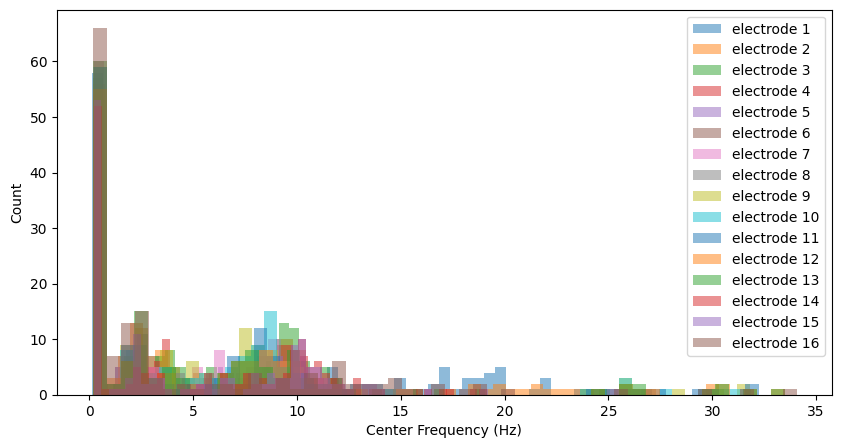

In [85]:
# plot histograms of center frequencies
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for i in range(len(center_freqs_2nd_probe)):
    ax.hist(center_freqs_2nd_probe[i], bins=50, alpha=0.5, label='electrode {}'.format(i+1))
ax.set_xlabel('Center Frequency (Hz)')
ax.set_ylabel('Count')
ax.legend()
plt.show()

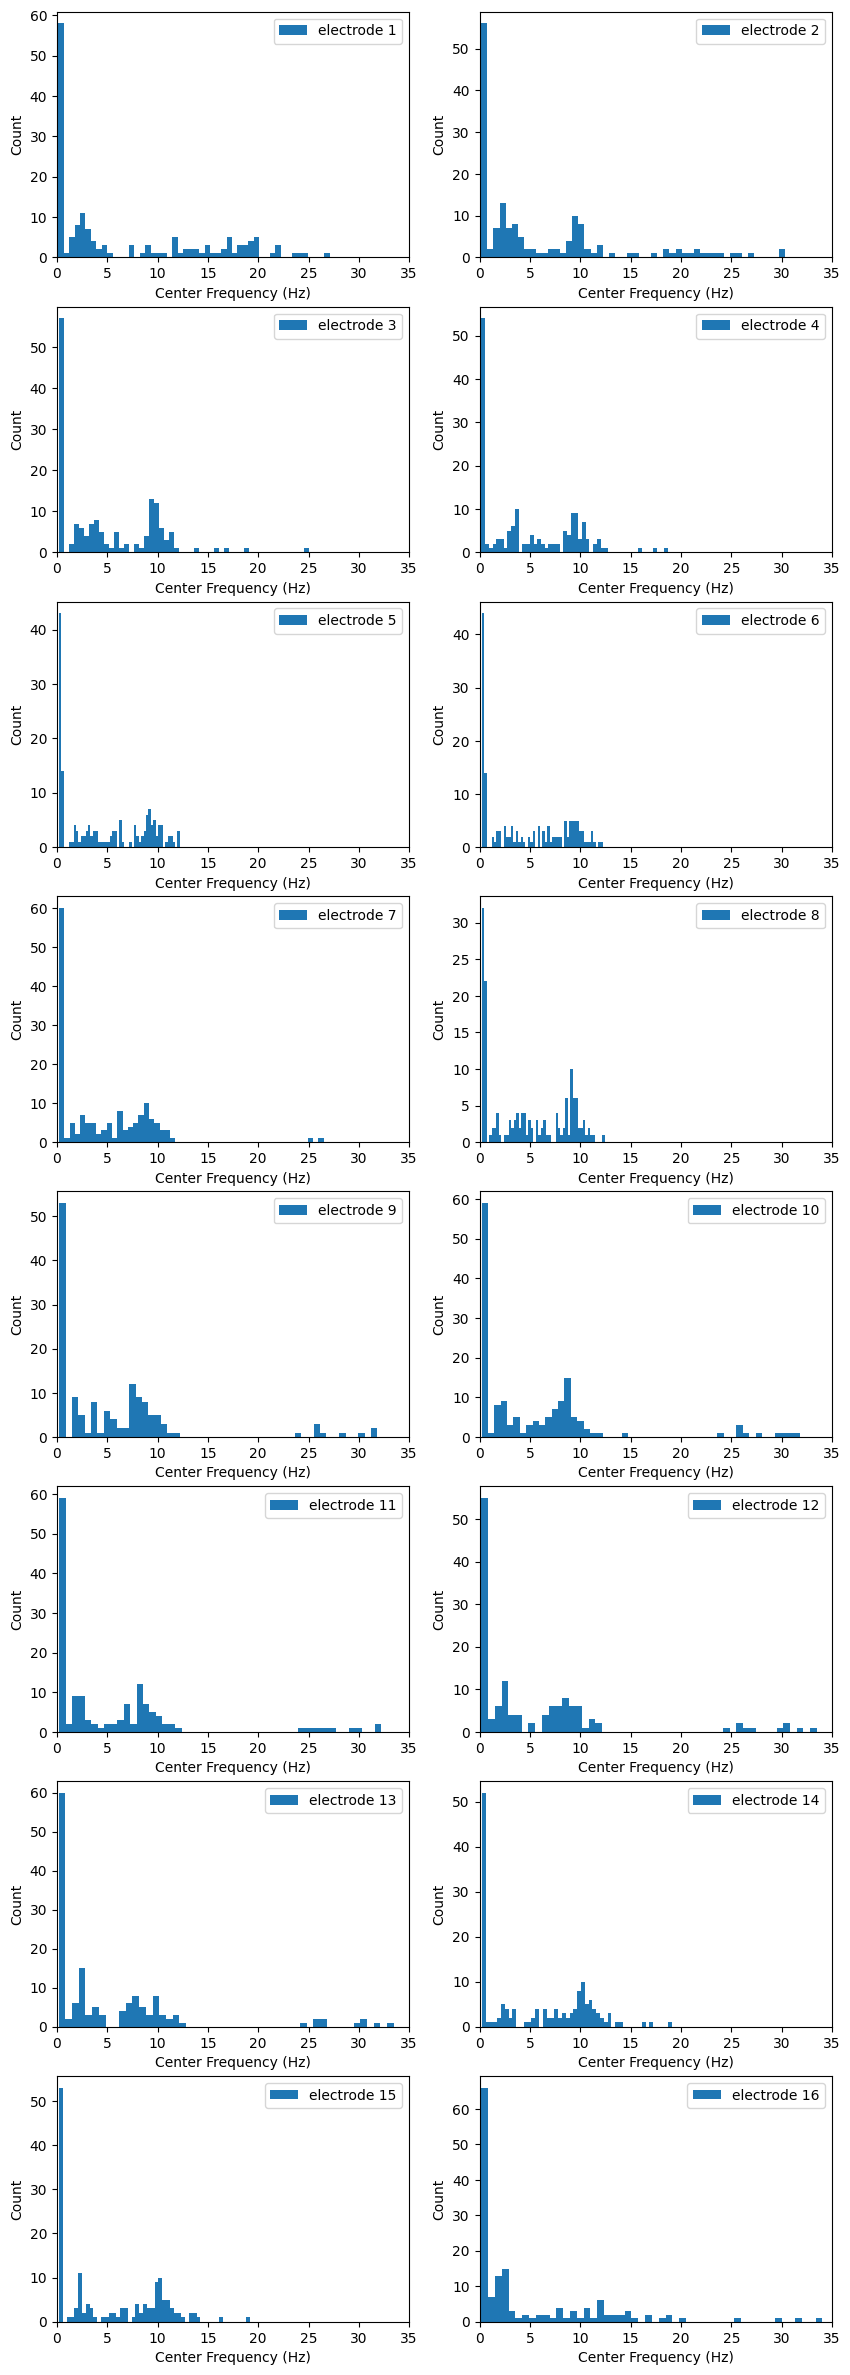

In [86]:
# plot histograms of center frequencies
fig, ax = plt.subplots(8, 2, figsize=(10, 30))
axes = ax.flatten()
for i, ax in zip(range(len(center_freqs_2nd_probe)), axes):
    ax.hist(center_freqs_2nd_probe[i], bins=50, label='electrode {}'.format(i+1))
    ax.set_xlabel('Center Frequency (Hz)')
    ax.set_ylabel('Count')
    ax.set_xlim([0, 35])
    ax.legend()
plt.show()

In [ ]:
# do same for surface electrodes